
# Intro 2: Qubit states and operators

Material adapted from https://github.com/amcdawes/QMlabs. I also recommend https://github.com/jrjohansson/scientific-python-lectures for a much more general approach to Python


## States

The simplest quantum system is a qubit, and we will use that simple example to illustrate how qutip handles states and operators.

The Hilbert space containing the states is $\mathcal{H}=\mathbb{C}^2$ and the usual coordinate representation is considered with respect to the eigenstates of the third spin component $\hat S_z=\hat \sigma_z$. Equivalently, we can consider it to be a two-level quantum states, each level being associated with the corresponding basis states. Qutip refers to the states of this basis as  'basis(n, p)' with $p\leq n$

State $|+\rangle$ (or $|1\rangle$)  and $|-\rangle$ (or $|0\rangle$) are then written as
$$
|+\rangle=basis(2,0)=\begin{pmatrix} 1 \\0 \end{pmatrix}; 
\\ |-\rangle=basis(2,1)=\begin{pmatrix} 0 \\1 \end{pmatrix}
$$

Therefore, an arbitrary element of $\mathbb{C}^2$ is written as
$$
|\psi\rangle=\alpha |+\rangle +\beta |-\rangle= \alpha*basis(2,0)+\beta *basis(2,1)=\begin{pmatrix} \alpha \\ \beta \end{pmatrix} \qquad  \alpha, \beta \in \mathbb{C}
$$

In [1]:
import numpy as np
from qutip import *


C:\Users\pc\ANa\Lib\site-packages\qutip\__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [8]:
basis(5,4)

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]]

In [9]:
ψ1=(2-1j)*basis(2,0)+(2-2j)*basis(2,1)
ψ=ψ1.unit() #Normaliza

We can verify that the function unit() acting on a state of $\mathbb{C}^2$ ($\psi1$ in this case), normalizes it.

In [10]:
ψ

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.5547002-0.2773501j]
 [0.5547002-0.5547002j]]

$\langle \psi,\psi\rangle$

In [11]:
ψ1.dag()*ψ1

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[13.]]

In [12]:
ψ

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.5547002-0.2773501j]
 [0.5547002-0.5547002j]]

In [13]:
ψ.dag()*ψ

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]

From an element of $\mathbb{C}^2$ we can obtain its coordinates with respect to the canonical basis, by computing the projections on the basis elements

In [14]:
basis(2,0).dag()*ψ #Coeficiente que multiplica al primer vector de la base

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.5547002-0.2773501j]]

In [15]:
basis(2,1).dag()*ψ

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.5547002-0.5547002j]]

## Operators

Arbitrary hermitian operators on $\mathbb{C}^2$ belong to the (real) linear space generated by the identity and the Pauli matrices, i.e.

$$
\hat A=\hat A^\dagger \Rightarrow  \hat A=A_0\hat \sigma_0+ A_1\hat \sigma_1+A_2\hat \sigma_2+ A_3\hat \sigma_3=
\begin{pmatrix} A_0+A_3 & A_1-iA_2 \\ A_1+iA_2 & A_0-A_3 \end{pmatrix}; \qquad A_0,A_1,A_2, A_3∈ \mathbb{R}
$$

Pauli matrices are implemented in qutip by the functions sigmax(), sigmay() and sigmaz(). The identity matrix, which we denote by $\sigma_0$, is implemented by the function  qeye(n)

In [2]:
coorA=[3,2,5,-4] 
BasisC2=[qeye(2), sigmax(), sigmay(), sigmaz()] #qeye-->identidad, lista de objetos necesarios

In [17]:
BasisC2

[Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[1. 0.]
  [0. 1.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0. 1.]
  [1. 0.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.+0.j 0.-1.j]
  [0.+1.j 0.+0.j]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[ 1.  0.]
  [ 0. -1.]]]

In [19]:
A=sum([coorA[j]*BasisC2[j] for j in range(len(BasisC2))]) #El operador A en la base de matrices de pauli
A

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-1.+0.j  2.-5.j]
 [ 2.+5.j  7.+0.j]]

Operators transform states into states:

In [59]:
ϕ=A*ψ #Se hace actuar al operador sobre el psi
ϕ

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-2.21880078-3.60555128j]
 [ 6.37905226-1.66410059j]]

In [110]:
basis(2,0).dag()*ϕ

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-2.21880078-3.60555128j]]

Spectrum of the operators is computed by using the eigenstates command

In [111]:
A.eigenstates() #Espectro de la matriz, lista con autovalores y autovectores

(array([-3.70820393,  9.70820393]),
 array([Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
        Qobj data =
        [[-0.89338816+0.j        ]
         [ 0.1668605 +0.41715126j]]                                  ,
        Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
        Qobj data =
        [[-0.44928566+0.j        ]
         [-0.33179603-0.82949008j]]                                  ],
       dtype=object))

As the output is an array of objects, we can access the eigenvalues as the 0-component of eigenstates(); and the eigenstates as the 1-component. These eigenstates appear also as an array, thus each one of them can be obtained as the suitable component of eigenstates()[1]

In [112]:
A.eigenstates()[0]

array([-3.70820393,  9.70820393])

In [113]:
A.eigenstates()[1][0]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.89338816+0.j        ]
 [ 0.1668605 +0.41715126j]]

How can we define the coordinates of a given matrix $A$? We obtain its coordinates with respect to the basis $\{\hat  \sigma_0, \hat \sigma_1,  \hat \sigma_2, \hat \sigma_3\}$. In order to do that, we use that the set of hermitian operators on $\mathcal{C}^2$ admits a scalar product defined as:
$$
\hat B_1,  \hat B_2 \in \mathrm{Herm}(\mathbb{C}^2); \qquad \langle \hat B_1| \hat B_2  \rangle =\mathrm{Tr}(\hat B_1 \hat B_2)
$$
This scalar product is usually known as **Hilbert-Schmidt scalar product** ( or norm, when applied to a single operator).


If we project on the elements of the basis, we obtain the coordinates:
$$
B_1^j=\frac{\mathrm{Tr}(\hat B_1\hat \sigma_j)}{\mathrm{Tr}(\hat \sigma_j\hat \sigma_j)}; \qquad j=0,1,2,3
$$

In [115]:
A0=((A*qeye(2)).tr())/2
A1=((A*sigmax()).tr())/2
A2=((A*sigmay()).tr())/2
A3=((A*sigmaz()).tr())/2

In [116]:
(A0,A1, A2, A3) #coinciden

(3.0, 2.0, 5.0, -4.0)

## Spin operators

Spin operators are proportional to the Pauli matrices:
$$
\hat S_x=\frac 12 \sigma_x, \qquad \hat S_y=\frac 12 \sigma_y, \qquad \hat S_z=\frac 12 \sigma_z
$$

These operators satisfy a certain properties with respect to the commutator, which makes the linear spaces generated by them a **Lie algebra**, known as $\mathfrak{su}(2)$:

$$
[\hat S_x, \hat S_y]=\hat S_x\hat S_y-\hat S_y\hat S_x=i \hbar \hat S_z; \qquad \text{cyclic rotation}
$$


We can implement this as a function in python, in the form

                      def function(argument 1, argument2, ...):
                          body of the function
                          return result

In [66]:
def comm(A,B):
    result= -1j*(A*B-B*A) #Conmutador de dos operadores autoadj no es autoadj, si se multiplica por -i se convierte en autoadj
    return result
Sx=0.5*sigmax()
Sy=0.5*sigmay()
Sz=0.5*sigmaz()

In [117]:
comm(Sx,Sy)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.  0.5]
 [0.5 0. ]]

And now we can check whether the commutation rules are as expected. Notice that the sign == produces a boolean result

In [120]:
comm(Sx,Sz)==-Sy

True

## One-dimensional projectors: points of the projective space

Points of the projective space $\mathcal{PH}$ are in one-to-one correspondence with the projectors on one-dimensional subspaces of the Hilbert space $\mathcal{H}$, i.e., on objects of the form
$$
\rho_\psi=\frac{|\psi\rangle \langle \psi|}{\langle \psi|\psi \rangle}
$$
These objects are:

1.- self-adjoint operators: this implies that for qubits can be written as a linear combination of the identity matrix and the Pauli matrices, i.e.,
$$
\rho_\psi=\frac 12\left (\rho_0 \sigma_0 +\rho_1\sigma_1+\rho_2\sigma_2+\rho_3\sigma_3\right )=\frac 12\begin{pmatrix} \rho_0+\rho_3 & \rho_1-i\rho_2 \\ \rho_1+i\rho_2 & \rho_0-\rho_3 \end{pmatrix}
$$
2.- of unit trace, i.e.
$$
\mathrm{Tr}\rho_\psi=1\Rightarrow \rho_0=1
$$

3.- projectors: this implies that the only possible eigenvalues are 0 and 1. If we compute the eigenvalues we obtain
$$
\lambda_\pm=\frac 12 \left (1\pm \sqrt{\rho_1^2+\rho_2^2+\rho_3^2} \right ) \Rightarrow \rho_1^2+\rho_2^2+\rho_3^2=1
$$

The set of 1-dimensional projectors can be parametrized by the points of the surface of a 2-sphere in $\mathbb{R}^3$. This is called the **Bloch sphere**. The choice of the factor $\frac 12 $ in front of the coordinates is conventional to define a unit sphere.

Qutip includes a few commands to represent graphically the Bloch sphere and even to draw on it states.  Those functions parametrize points with the $(\rho_1, \rho_2, \rho_3)$ coordinates.

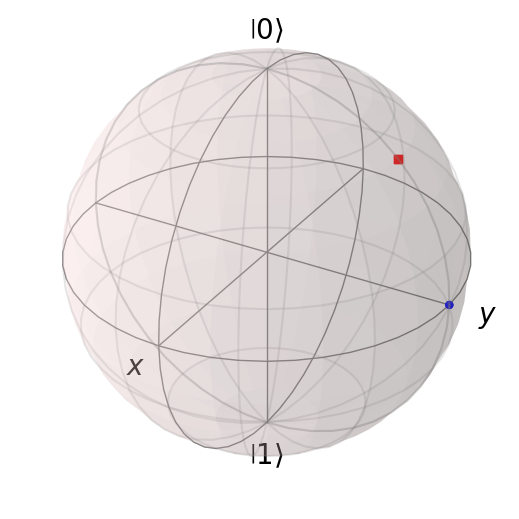

In [69]:
# Representation of the Bloch sphere
b=Bloch()

# We add some vectors
b.vector_color='r'

# We can also add points on the sphere

b.add_points((0,1,0))
b.add_points((0,1/np.sqrt(2),1/np.sqrt(2)))

# Show plot
b.show()

How can we define the point on the Bloch sphere which corresponds to the projector on some state $\psi\in \mathbb{C}^2$? First, we compute the projector as a qutip-object, and then obtain its coordinates with respect to the basis $\{\frac 12\hat  \sigma_0, \frac 12\hat \sigma_1, \frac 12 \hat \sigma_2, \frac 12\hat \sigma_3\}$. 
If we project on the Pauli matrices, we obtain the coordinates:
$$
B_1^j=\mathrm{Tr}(\hat B_1\hat \sigma_j); \qquad j=0,1,2,3
$$
Notice that the factors $\frac 12$ compensate with the traces of the identity matrix.

In [125]:
ρψ=ψ.unit()*((ψ.unit()).dag()) #Normalizado por el mismo objeto dualizado

In [124]:
ρψ

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.38461538+0.j         0.46153846+0.15384615j]
 [0.46153846-0.15384615j 0.61538462+0.j        ]]

In [72]:
ρψ.eigenstates()

(array([-2.77555756e-17,  1.00000000e+00]),
 array([Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
        Qobj data =
        [[-0.78446454+0.j        ]
         [ 0.58834841-0.19611614j]]                                  ,
        Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
        Qobj data =
        [[-0.62017367+0.j        ]
         [-0.74420841+0.24806947j]]                                  ],
       dtype=object))

In [73]:
ρψ0=ρψ.tr()
ρψ1=(ρψ*sigmax()).tr()
ρψ2=(ρψ*sigmay()).tr()
ρψ3=(ρψ*sigmaz()).tr()

In [74]:
coord=(ρψ0, ρψ1, ρψ2, ρψ3)

In [75]:
coord

(1.0, 0.9230769230769231, -0.3076923076923077, -0.23076923076923078)

In [76]:
sum( 1/2*coord[j]*BasisC2[j] for j in range(len(coord)))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.38461538+0.j         0.46153846+0.15384615j]
 [0.46153846-0.15384615j 0.61538462+0.j        ]]

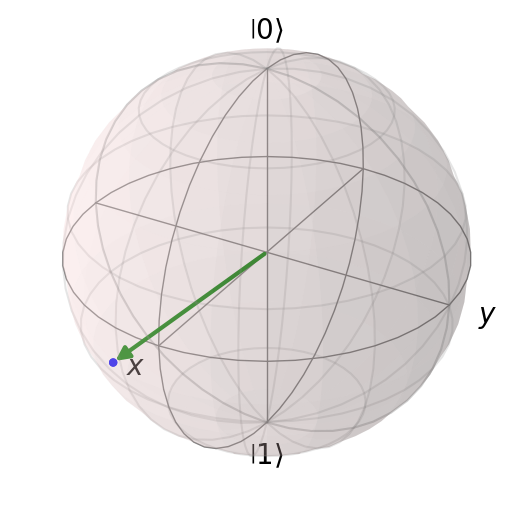

In [77]:
# Representation of the Bloch sphere
b=Bloch()

b.add_points((ρψ1, ρψ2, ρψ3))
b.add_vectors((ρψ1, ρψ2, ρψ3))

# Show plot
b.show()

## Evaluating operators on states. Probabilities and expectation values

From the definition of the qutip objects, we can directly translate the expression
$$
\langle A \rangle=\frac{\langle \psi |\hat A \psi\rangle}{\langle \psi|\psi\rangle} \mapsto  (\psi.unit()).dag()*(A*psi.unit()) 
$$


In [78]:
(ψ.unit()).dag()*(A*ψ.unit())

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[4.23076923]]

We can also use the projector $\rho_\psi$ and compute the expectation value by the trace of the product with the operator
$$
\langle A \rangle=\mathrm{Tr}(\hat A\hat \rho_\psi)
$$

In [79]:
(A*ρψ).tr()

4.230769230769232

Nonetheless, qutip provides the command expect(operator, state)

In [128]:
expect(A, ψ)

4.230769230769231

In [129]:
expect(A,ρψ)

4.230769230769232

What is the probability to obtain a certain eigenvalue as a result of the measure of a physical magnitude modelled by the self-adjoint operator $\hat A$ in an experiment? The postulates of Quantum Mechanics tell us that if $\lambda$ is an eigenvalue with eigenvector $|\psi_\lambda\rangle$, the probability that a system in state $|\psi\rangle$ produces a measurement of the magnitude modelled by $A$ with result $\lambda$ is
$$
\mathtt{P}_\lambda=|\langle \psi_\lambda |\psi\rangle |^2
$$
How can we implement this in qutip? First, eigenstates() of an operator $\hat A$ produces a list with two objects: 
   1. an n-dimensional array containing the eigenvalues of $\hat A$
   2. an array of states containing a basis of eigenvectors for $\hat A$ with norm equal to 1
   
 Thus:

In [130]:
[evals, evecs]=A.eigenstates()

In [131]:
evals

array([-3.70820393,  9.70820393])

In [132]:
evecs

array([Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
       Qobj data =
       [[-0.89338816+0.j        ]
        [ 0.1668605 +0.41715126j]]                                  ,
       Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
       Qobj data =
       [[-0.44928566+0.j        ]
        [-0.33179603-0.82949008j]]                                  ],
      dtype=object)

In [133]:
evecs[0]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.89338816+0.j        ]
 [ 0.1668605 +0.41715126j]]

In [20]:
prob0=(evecs[0].dag()*ψ).dag()*(evecs[0].dag()*ψ)
prob0

NameError: name 'evecs' is not defined

we can also define a function, which provides us with the probabilities of the eigenvalues of an operator 'A'  for any state 'state'.


In [87]:
def prob(B, state):
    [evals, evecs]=B.eigenstates()
    probabilities=[(j.dag()*state).dag()*(j.dag()*state) for j in evecs]
    return [(evals[j], probabilities[j]) for j in range(len(probabilities))]

In [88]:
prob(A, ψ)

[(-3.7082039324993707,
  Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
  Qobj data =
  [[0.40826388]]),
 (9.708203932499366,
  Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
  Qobj data =
  [[0.59173612]])]

In [89]:
def amplitude(B,state):
    res=expect(B*B, state)-expect(B, state)**2
    return res

In [90]:
amplitude(A, ψ)

43.48520710059172

# Exercises

1. Verify the spectral theorem for operator A: obtain the projectors on the eigenspaces and verify that their sum is the identity and that they are orthogonal. Represent the corresponding projectors on the Bloch sphere.

2. Compute the amplitude 
$$
\Delta  \hat A= \langle \hat A^2\rangle -\langle \hat A \rangle ^2
$$

3. Compute the possible results of the measurement of the second component of spin on the state
$$
|\psi\rangle= \begin{pmatrix} \frac {1}{\sqrt{3}} \\ \sqrt{\frac {2}{3}} \end{pmatrix}
$$

In [126]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.7.5
Numpy,1.24.3
SciPy,1.11.1
matplotlib,3.7.2
Cython,3.0.8
Number of CPUs,4
BLAS Info,INTEL MKL
IPython,8.15.0
Python,"3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]"
OS,nt [win32]
